In [97]:
import pandas as pd

In [98]:
# Getting the data from our repository on Github
url = 'https://raw.githubusercontent.com/yasmin-mohamed-sufi/Avi/main/df_t1datum.csv'
ts1 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/yasmin-mohamed-sufi/Avi/main/df_t2datum.csv'
ts2 = pd.read_csv(url)

In [99]:
# Merging the two parts together
list = [ts1, ts2]
ts = pd.concat(list, axis=0, join="outer", ignore_index=True)

# Dropping an unecessary column
ts = ts.drop("Unnamed: 0", axis=1)

# Transforming objects to datetime
ts["datum"] = pd.to_datetime(ts["datum"])
ts

,datum,dangerLevel,elevation_th,HN72_24,HN24_7d,Pen_depth,HN24,min_ccl_pen,RH,wind_trans24_3d,wind_trans24,wind_trans24_7d,warnreg
0,1997-11-11,2.0,2000.0,54.171375,107.07,42.120689,31.513500,0.18,94.3750,6.60,4.150375,29.01,15.0
1,1997-11-12,2.0,2300.0,69.655625,104.03,29.936934,36.570125,0.21,88.7500,5.05,1.358000,15.72,15.0
2,1997-11-12,3.0,2000.0,102.098125,150.70,37.159607,54.272000,0.24,93.3750,112.12,105.515000,132.03,15.0
3,1997-11-12,2.0,2300.0,80.960375,136.84,39.275160,43.528125,0.20,81.8750,0.00,0.000000,4.90,15.0
4,1997-11-13,2.0,2300.0,61.764875,101.70,26.552468,0.574625,0.28,60.6250,15.61,11.662125,23.97,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64508,2020-05-03,2.0,2600.0,3.161125,21.94,7.603113,0.451625,2.16,49.4375,4.27,1.782500,16.54,21.0
64509,2020-05-03,2.0,2600.0,16.543375,58.03,14.847116,0.948000,0.35,65.1375,17.32,1.242250,33.48,21.0
64510,2020-05-03,2.0,2400.0,40.174625,61.44,17.816030,5.519375,0.27,75.9875,18.12,5.835375,24.40,21.0
64511,2020-05-03,2.0,2400.0,27.050875,40.95,11.679789,1.507250,0.30,65.5375,20.83,5.153125,39.55,21.0


In [100]:
# Getting an overview of the danger levels
ts["dangerLevel"].value_counts()

2.0    31737
3.0    25368
1.0     6376
4.0     1009
5.0       23
Name: dangerLevel, dtype: int64

In [101]:
# For Time Series only the datetime and the target value are needed 
# Thus only those two columns will be in the dataframe moving forward
df = ts.loc[:,["dangerLevel", "datum"]].copy()

# Getting a daily average for the dangerlevel so we have one value per day
vis = df.groupby("datum").mean()
vis

,dangerLevel
datum,
1997-11-11,2.000000
1997-11-12,2.333333
1997-11-13,2.000000
1997-11-14,2.000000
1997-11-15,2.000000
...,...
2020-04-29,2.000000
2020-04-30,2.133333
2020-05-01,2.000000


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns 

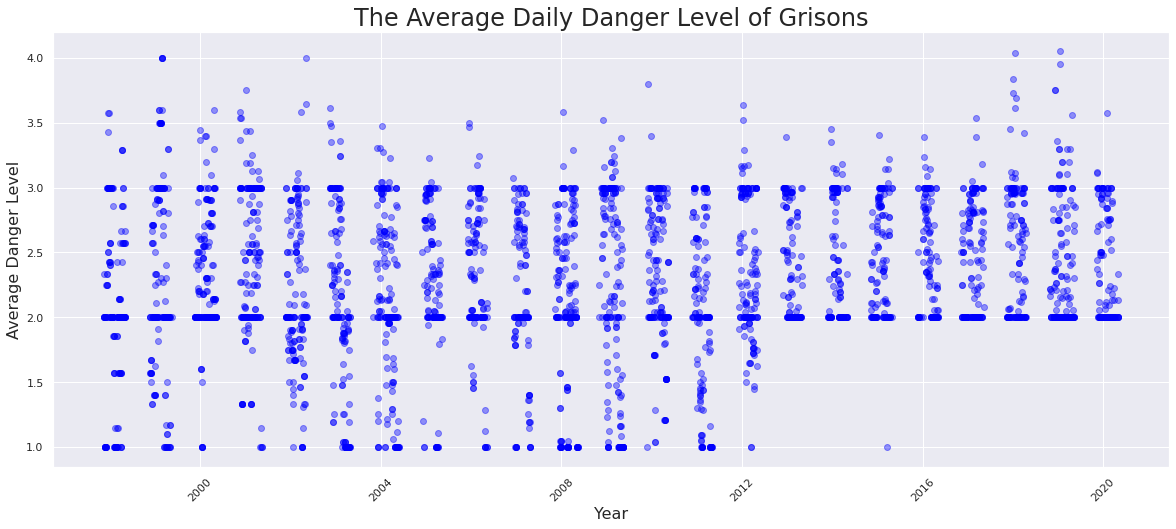

In [168]:
# Illustrating the average daily danger level for Gaubünden

sns.set()

fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(vis.index, vis["dangerLevel"], color="blue", linewidth=1, alpha=0.4) 
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("The Average Daily Danger Level of Grisons", size = 24)
plt.show()

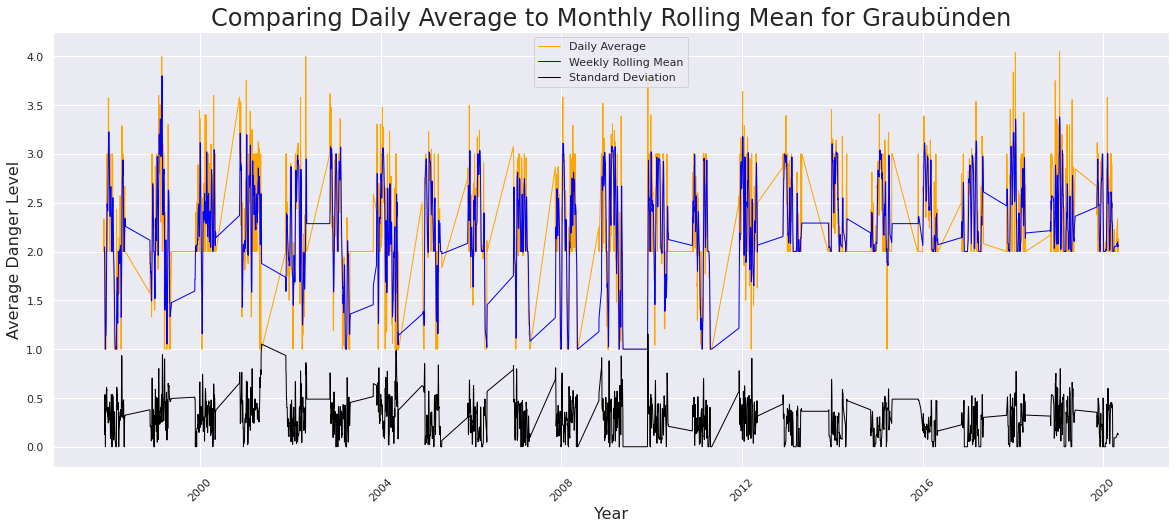

In [169]:
# Computing a weekly rolling mean to smooth out the peaks and troughs
rolling_mean_w = vis.rolling(7).mean()
rolling_std_w = vis.rolling(7).std()

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(vis.index, vis["dangerLevel"], color="orange", linewidth=1, label = "Daily Average")
ax.plot(vis.index, rolling_mean_w["dangerLevel"], color="blue", linewidth=1, label = "Weekly Rolling Mean")
ax.plot(vis.index, rolling_std_w["dangerLevel"], color="black", linewidth=1, label = "Standard Deviation")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Comparing Daily Average to Monthly Rolling Mean for Graubünden", size = 24)
ax.legend()
plt.show()

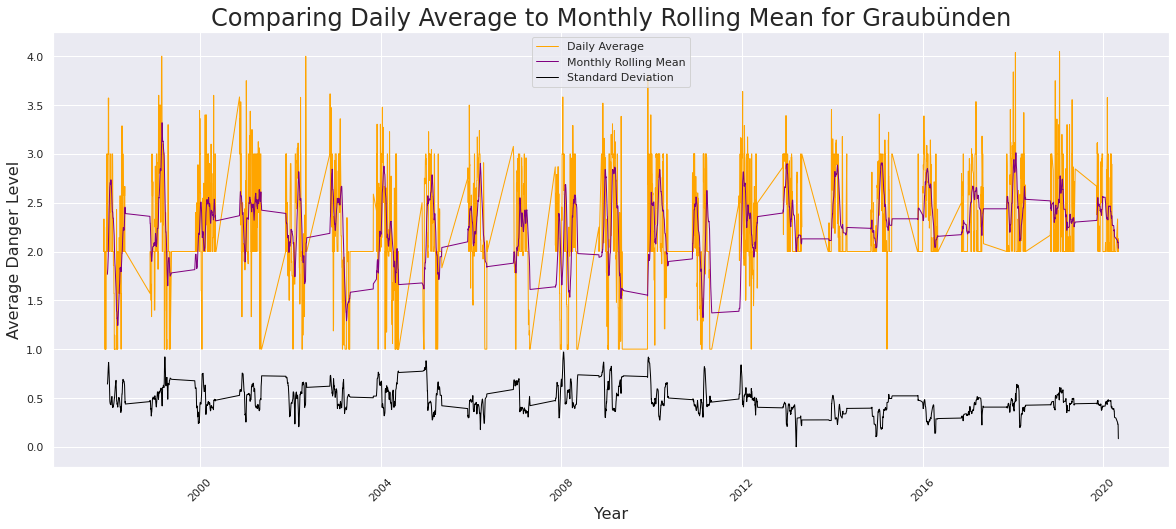

In [170]:
# Computing a monthly rolling mean to smooth out the peaks and troughs even more
rolling_mean_m = vis.rolling(30).mean()
rolling_std_m = vis.rolling(30).std()

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(vis.index, vis["dangerLevel"], color="orange", linewidth=1, label = "Daily Average")
ax.plot(vis.index, rolling_mean_m["dangerLevel"], color="purple", linewidth=1, label = "Monthly Rolling Mean")
ax.plot(vis.index, rolling_std_m["dangerLevel"], color="black", linewidth=1, label = "Standard Deviation")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Comparing Daily Average to Monthly Rolling Mean for Graubünden", size = 24)
ax.legend()
plt.show()

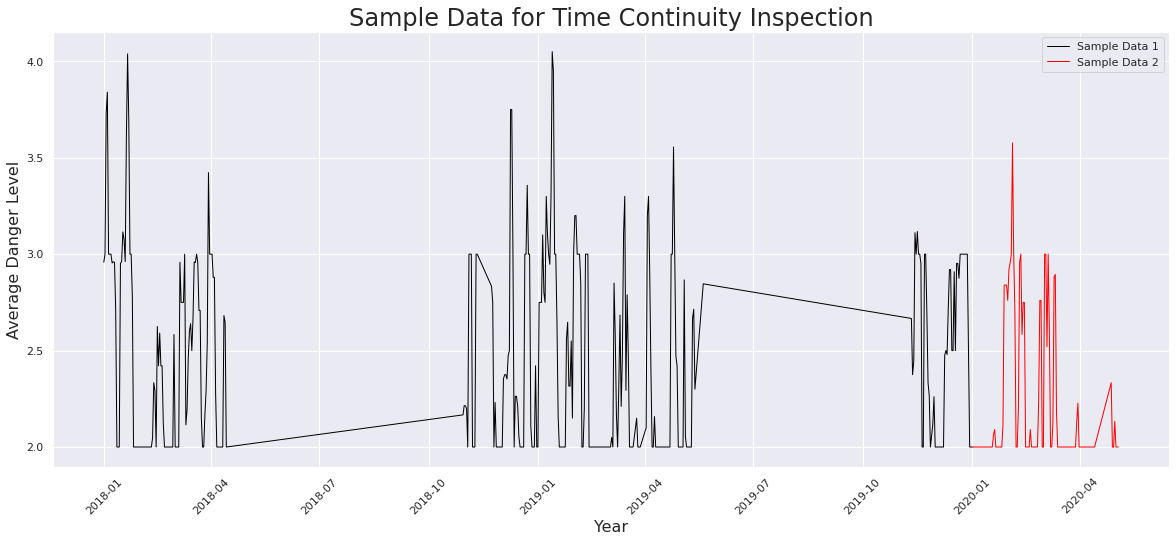

In [171]:
# Looking closer at the values
train = vis.loc['2018-01-01':"2020-01-01",:].copy()
test = vis.loc["2020-01-01":, :].copy()

# We have data from November to April 
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(train.index, train["dangerLevel"], color="black", linewidth=1, label="Sample Data 1")
ax.plot(test.index, test["dangerLevel"], color="red", linewidth=1, label = "Sample Data 2")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Sample Data for Time Continuity Inspection", size = 24)
ax.legend()
plt.show()

In [172]:
# Creating test and training data
train = vis.loc[:"2014-01-01",:].copy()
test = vis.loc["2014-01-01":, :].copy()
train

,dangerLevel
datum,
1997-11-11,2.000000
1997-11-12,2.333333
1997-11-13,2.000000
1997-11-14,2.000000
1997-11-15,2.000000
...,...
2013-12-28,3.000000
2013-12-29,3.000000
2013-12-30,2.925926


In [109]:
# Downloads pmdaria 
# Need to restart run time if not installed
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
# Using first time series model auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1671.739, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4997.137, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1675.006, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3132.687, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11850.551, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1669.744, Time=0.89 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2361.472, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1667.765, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1669.749, Time=2.57 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1667.886, Time=1.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1870.441, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 8.088 seconds


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

  return get_prediction_index(



In [111]:
# The forecast is aproaching a stable number -> the mean of all the values
forecast

2624    2.865599
2625    2.755845
2626    2.664985
2627    2.589766
2628    2.527495
          ...   
3611    2.228018
3612    2.228018
3613    2.228018
3614    2.228018
3615    2.228018
Length: 992, dtype: float64

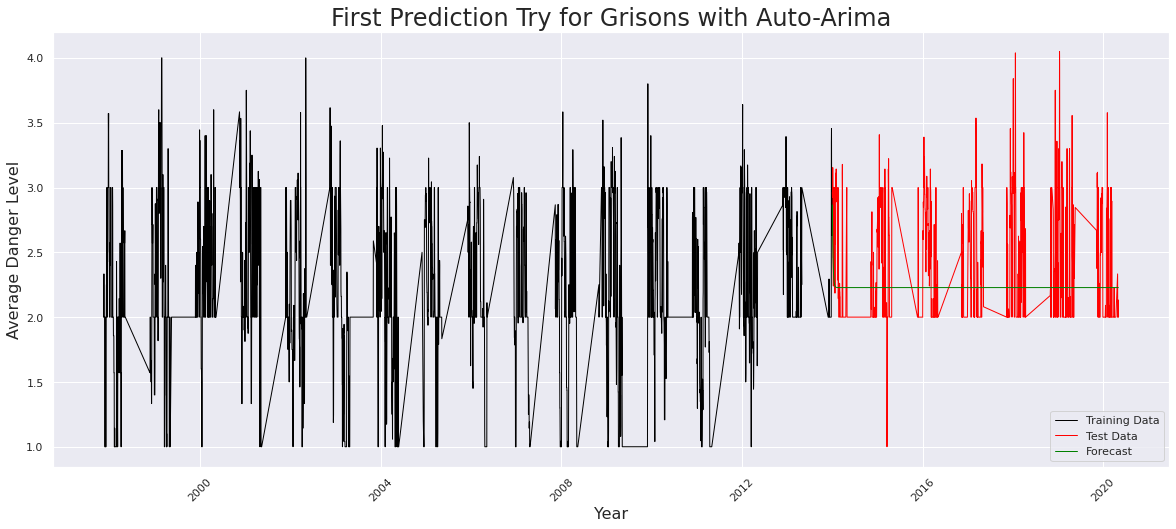

In [173]:
# Forecast visualized as a straight line in green -> not excately what we wanted

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(train.index, train["dangerLevel"], color="black", linewidth=1, label = "Training Data")
ax.plot(test.index, test["dangerLevel"], color="red", linewidth=1, label = "Test Data")
ax.plot(test.index, forecast, color="green", linewidth=1, label = "Forecast")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("First Prediction Try for Grisons with Auto-Arima", size = 24)
ax.legend()
plt.show()

In [113]:
vis

,dangerLevel
datum,
1997-11-11,2.000000
1997-11-12,2.333333
1997-11-13,2.000000
1997-11-14,2.000000
1997-11-15,2.000000
...,...
2020-04-29,2.000000
2020-04-30,2.133333
2020-05-01,2.000000


In [114]:
# Transforming the dataframe into the required form for the other Time Series Models

vis_series = vis.squeeze()

from pmdarima.model_selection import train_test_split
vis_df = pd.DataFrame(
    {
        'ds': vis_series.index,
        'y': vis_series.values,
    },
    index=pd.Index([0] * vis_series.size, name='unique_id')
)

# Split into train and test sets for the third time series model
vis_train, vis_test = train_test_split(vis_df, train_size=0.7)
vis_train

,ds,y
unique_id,,
0,1997-11-11,2.000000
0,1997-11-12,2.333333
0,1997-11-13,2.000000
0,1997-11-14,2.000000
0,1997-11-15,2.000000
...,...,...
0,2013-02-13,2.000000
0,2013-02-14,2.000000
0,2013-02-15,2.000000


In [115]:
# Dropping na values for the next model
rolling_mean_w = rolling_mean_w.dropna()
rolling_mean_m = rolling_mean_m.dropna()

In [116]:
# Transforming the weekly rolling mean into the required form for the other Time Series Models
w_series = rolling_mean_w.squeeze()

w_df = pd.DataFrame(
    {
        'ds': w_series.index,
        'y': w_series.values,
    },
    index=pd.Index([0] * w_series.size, name='unique_id')
)

# Split into train and test sets for the third time series model
w_train, w_test = train_test_split(w_df, train_size=0.7)

In [117]:
# # Transforming the monthly rolling mean into the required form for the other Time Series Models
m_series = rolling_mean_m.squeeze()

m_df = pd.DataFrame(
    {
        'ds': m_series.index,
        'y': m_series.values,
    },
    index=pd.Index([0] * m_series.size, name='unique_id')
)

# Split into train and test sets for the third time series model
m_train, m_test = train_test_split(m_df, train_size=0.7)

In [118]:
# Importing the second Time Series Model Pyaf
!pip install pyaf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 12.5 MB/s 


In [137]:
# Resplitting the dataframe for Piaf
train = vis_df.loc[vis_df["ds"]<"2014-01-01"]
test = vis_df.loc[vis_df["ds"]>="2014-01-01"]
test

,ds,y
unique_id,,
0,2014-01-01,2.962963
0,2014-01-02,2.925926
0,2014-01-03,2.962963
0,2014-01-04,3.153846
0,2014-01-05,3.000000
...,...,...
0,2020-04-29,2.000000
0,2020-04-30,2.133333
0,2020-05-01,2.000000


In [141]:
import pyaf.ForecastEngine as autof
horizon = len(test)

#set up the model engine
lEngine = autof.cForecastEngine()
# get the best time series model for test prediction
lEngine.train(iInputDS = train, iTime = 'ds', iSignal = 'y', iHorizon = horizon)

In [149]:
# Forecasting
forecast_df= lEngine.forecast(train, horizon)

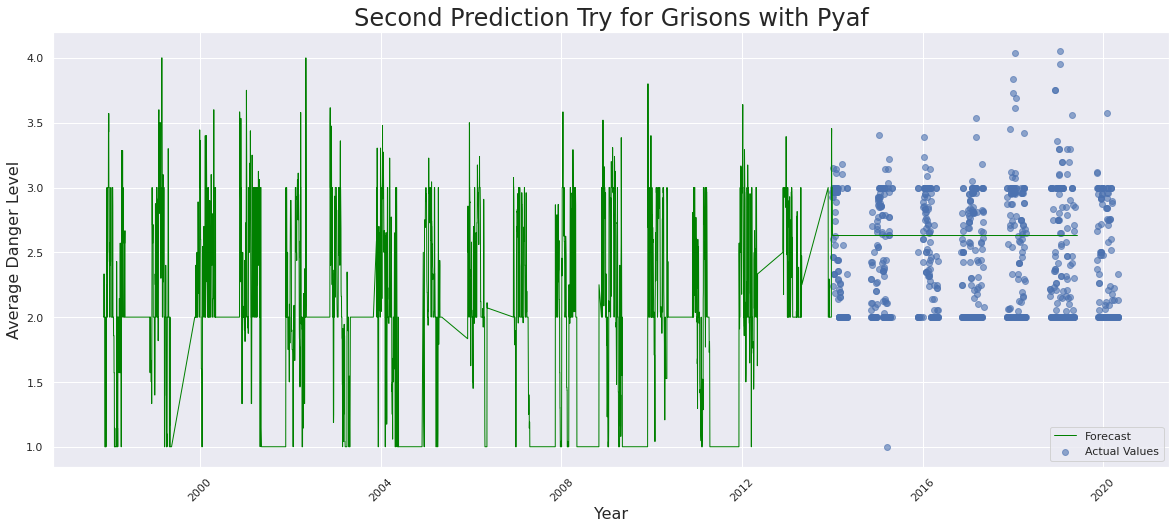

In [162]:
# Illustrating the forcast -> another straight line
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(forecast_df["ds"], forecast_df["y_Forecast"] , color="green", linewidth=1, label = "Forecast")
ax.scatter(test["ds"], test["y"], alpha=0.6, label = "Actual Values")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Second Prediction Try for Grisons with Pyaf", size = 24)
ax.legend()
plt.show()

In [122]:
# Installing the third and last model -> neuralProphet
!pip install neuralprophet
!pip install neuralprophet[live]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


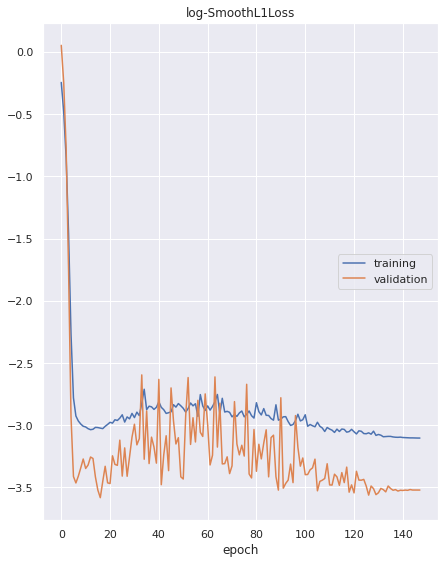

log-SmoothL1Loss
	training         	 (min:   -3.103, max:   -0.245, cur:   -3.103)
	validation       	 (min:   -3.582, max:    0.053, cur:   -3.521)


In [123]:
from neuralprophet import NeuralProphet
m = NeuralProphet()
metrics = m.fit(vis_train, freq='D', validation_df=vis_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.984% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.984% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.984% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.984% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


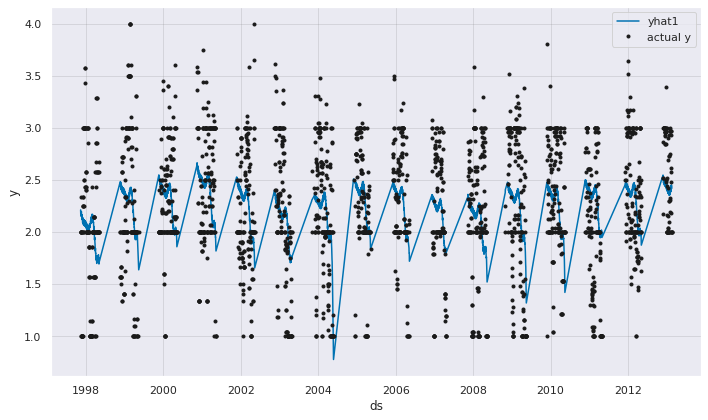

In [124]:
# Checking the forecast on the training data
forecast_vis = m.predict(vis_train)
fig = m.plot(forecast_vis)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.037% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.037% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.037% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.037% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


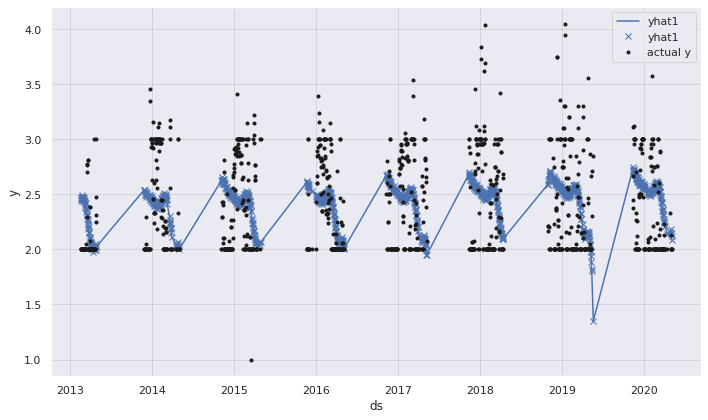

In [125]:
# Checking the forecast on the test data
forecast_vis = m.predict(vis_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_vis)

In [153]:
# Checking out the prediction
forecast_vis

,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2013-02-18,2.000000,0.449862,2.449862,1.491671,0.956811,0.001379
1,2013-02-19,2.000000,0.477753,2.477753,1.491722,0.960387,0.025644
2,2013-02-20,2.000000,0.445586,2.445586,1.491774,0.963676,-0.009864
3,2013-02-21,2.000000,0.464171,2.464171,1.491825,0.966628,0.005718
4,2013-02-22,2.000000,0.471812,2.471812,1.491876,0.969191,0.010744
...,...,...,...,...,...,...,...
1080,2020-04-29,2.000000,0.142497,2.142497,1.626613,0.525748,-0.009864
1081,2020-04-30,2.133333,0.018118,2.151452,1.626664,0.519070,0.005718
1082,2020-05-01,2.000000,0.147622,2.147622,1.626716,0.510162,0.010744
1083,2020-05-02,2.000000,0.120094,2.120094,1.626767,0.498789,-0.005462


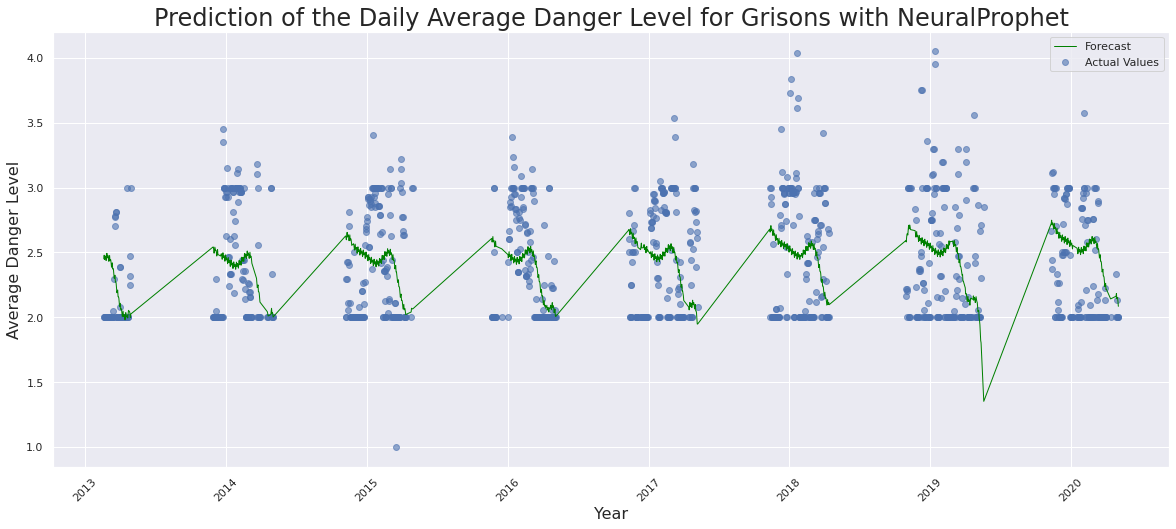

In [175]:
# Plotting the prediction for the test data in a customized diagram
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(forecast_vis["ds"], forecast_vis["yhat1"] , color="green", linewidth=1, label = "Forecast")
ax.scatter(vis_test["ds"], vis_test["y"], alpha=0.6, label = "Actual Values")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Prediction of the Daily Average Danger Level for Grisons with NeuralProphet", size = 24)
ax.legend()
plt.show()

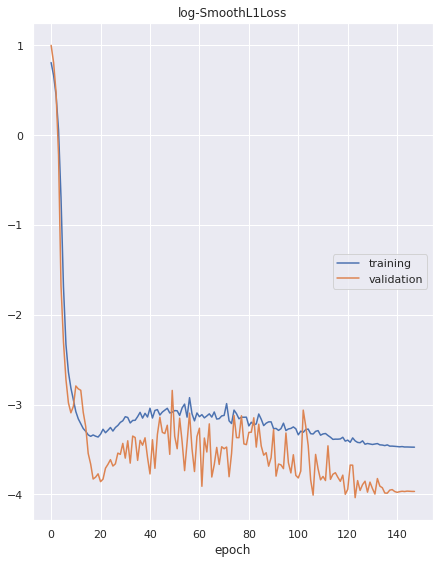

log-SmoothL1Loss
	training         	 (min:   -3.475, max:    0.807, cur:   -3.475)
	validation       	 (min:   -4.037, max:    0.998, cur:   -3.967)


In [126]:
m = NeuralProphet()
metrics = m.fit(w_train, freq='D', validation_df=w_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.981% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.981% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.981% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.981% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


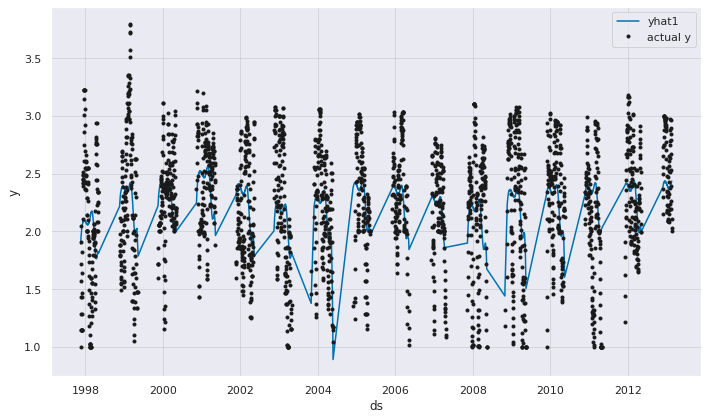

In [127]:
# Checking the forecast on the training data for weekly rolling mean
forecast_w = m.predict(w_train)
fig = m.plot(forecast_w)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.03% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.03% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.03% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.03% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


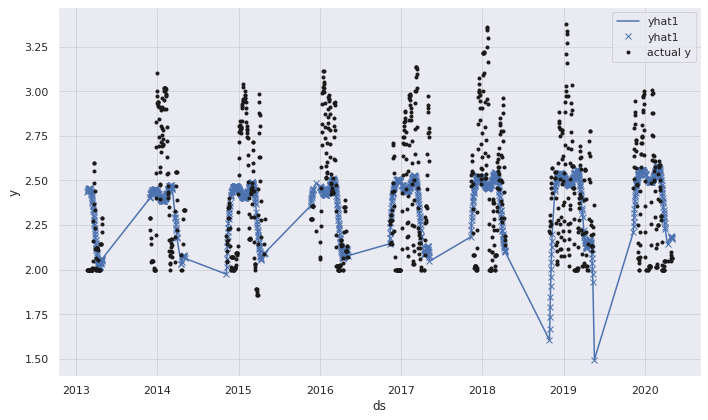

In [128]:
# Checking the forecast on the test data for the weekly rolling 
forecast_w = m.predict(w_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_w)

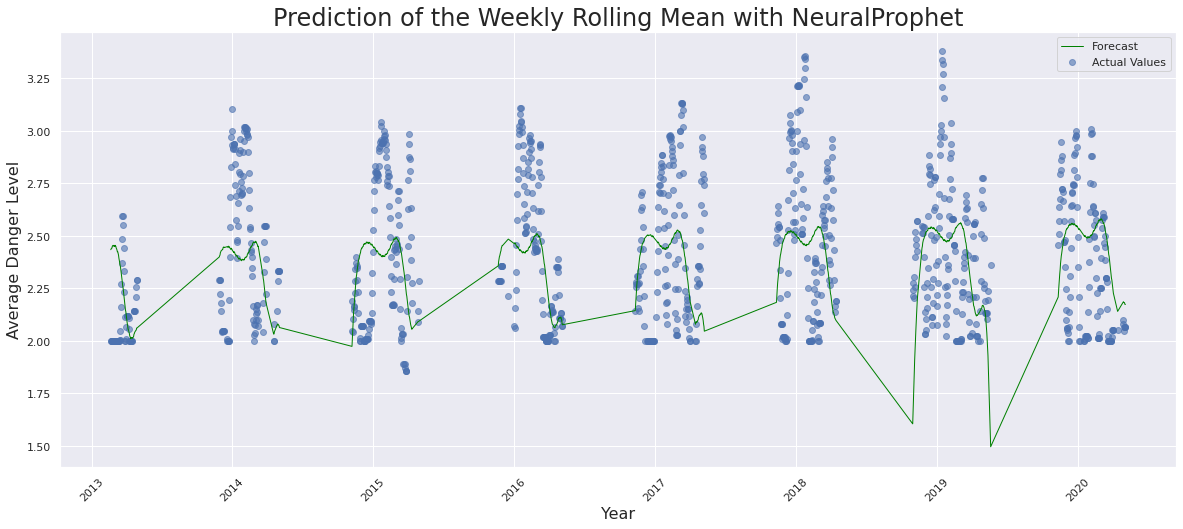

In [178]:
# Plotting the prediction for the test data in a customized diagram
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(forecast_w["ds"], forecast_w["yhat1"] , color="green", linewidth=1, label = "Forecast")
ax.scatter(w_test["ds"], w_test["y"], alpha=0.6, label = "Actual Values")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Prediction of the Weekly Rolling Mean with NeuralProphet", size = 24)
ax.legend()
plt.show()

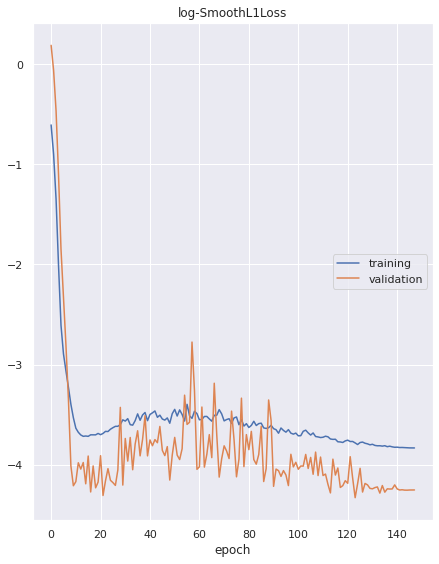

log-SmoothL1Loss
	training         	 (min:   -3.834, max:   -0.605, cur:   -3.834)
	validation       	 (min:   -4.331, max:    0.191, cur:   -4.254)


In [129]:
m = NeuralProphet()
metrics = m.fit(m_train, freq='D', validation_df=m_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.968% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.968% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


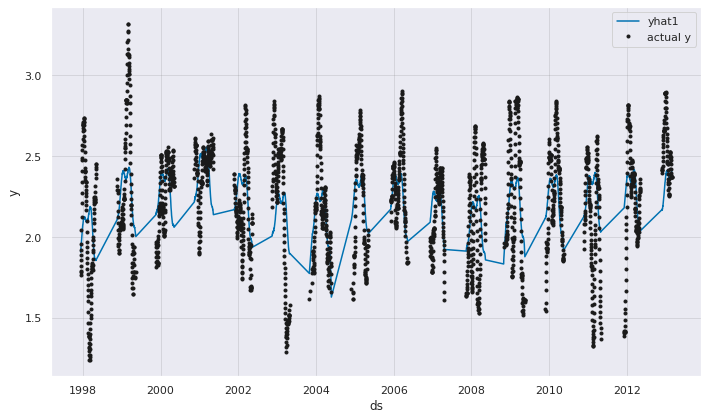

In [130]:
# Checking the forecast on the train data of the monthly rolling mean
forecast_m = m.predict(m_train)
fig = m.plot(forecast_m)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.004% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.004% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.004% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.004% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


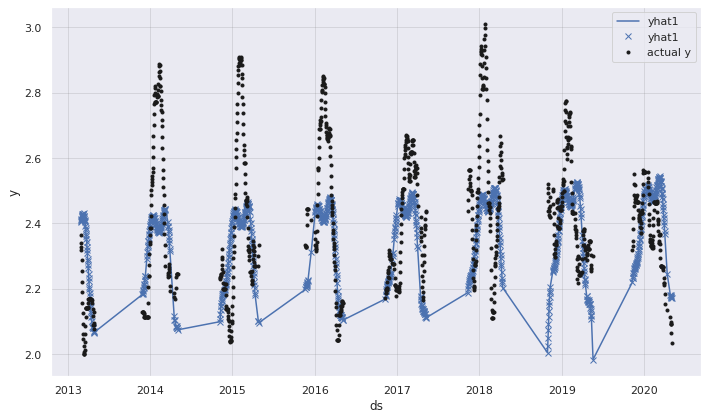

In [131]:
# Checking the forecast on the test data of the monthly rolling mean
forecast_m = m.predict(m_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_m)

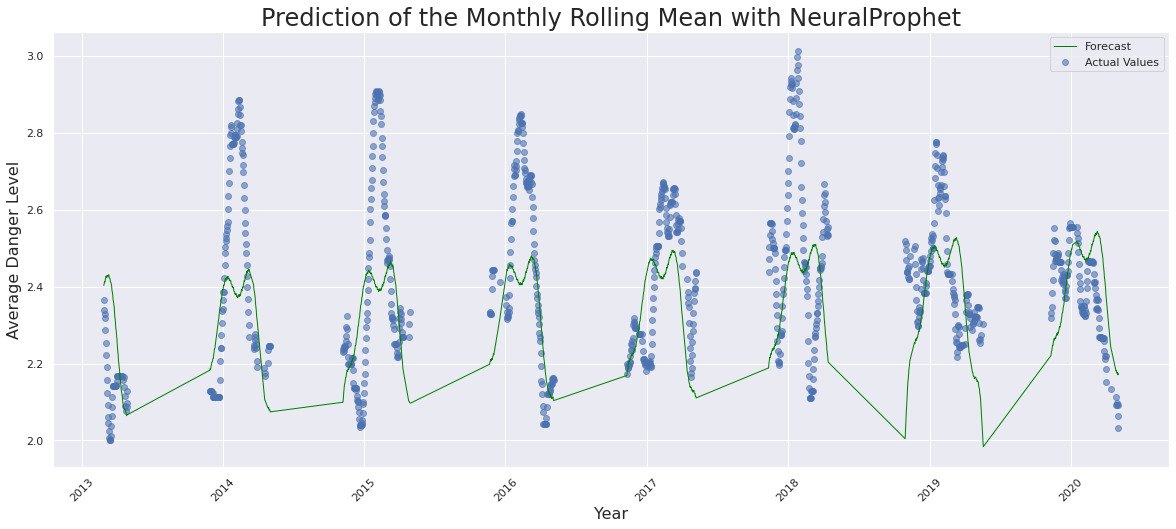

In [160]:
# Plotting the prediction for the test data in a customized diagram
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(forecast_m["ds"], forecast_m["yhat1"] , color="green", linewidth=1, label = "Forecast")
ax.scatter(m_test["ds"], m_test["y"], alpha=0.6, label = "Actual Values")
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Average Danger Level", size = 16)
ax.set_title("Prediction of the Monthly Rolling Mean with NeuralProphet", size = 24)
ax.legend()
plt.show()